# Author - Ashna Chauhan

## The Sparks Foundation, GRIP, April'21
## Task -2- Prediction using Unsupervised Machine Learning

## Importing all the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Importing dataset

In [2]:
data = pd.read_csv("C:\\Users\\Shubham\\Downloads\\Iris.csv")
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for missing values

In [4]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

#### Thus our dataset has no missing value for any variable.

## Determining the optimum number of clusters
### The Elbow method

In [5]:
# Changing the figure size
fig_size = plt.rcParams['figure.figsize']
fig_size[0]= 10
fig_size[1]= 7
plt.rcParams['figure.figsize']= fig_size

In [6]:
# Selecting the relevant variables for clustering
x = data.iloc[:, 0:]

WCSS = list()

for i in range(1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
Number_of_Clusters = list(range(1,6))
WCSS

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034]

<function matplotlib.pyplot.show(close=None, block=None)>

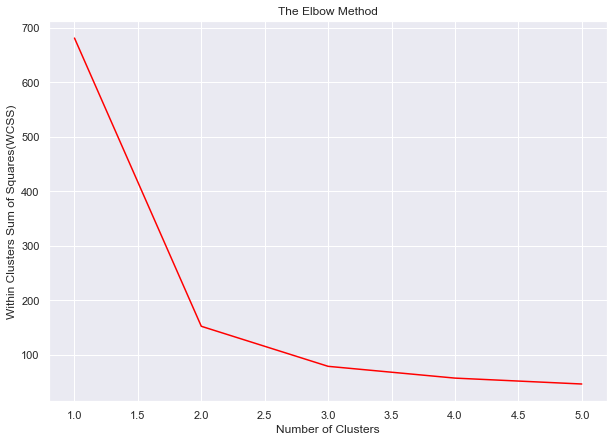

In [7]:
# Plotting WCSS and number of clusters on the graph to determine the optimum number of clusters
plt.plot( Number_of_Clusters, WCSS, c="Red")
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(WCSS)')
plt.title("The Elbow Method")
plt.show

#### Since after 3 clusters, the decrease in within cluster sum of squares is relatively very low, so adding more clusters doesn't benefits any further. Thus, the optimal number of clusters is 3 where we have the elbow of the graph.

## Perfoming clustering

In [8]:
# We perform clustering by chosing the number of clusters, k, to be 3 as determined using elbow method
x = pd.DataFrame(data.iloc[:,0:])
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
Clusters = kmeans.fit_predict(x)
x ['Clusters'] = Clusters
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualising the clusters

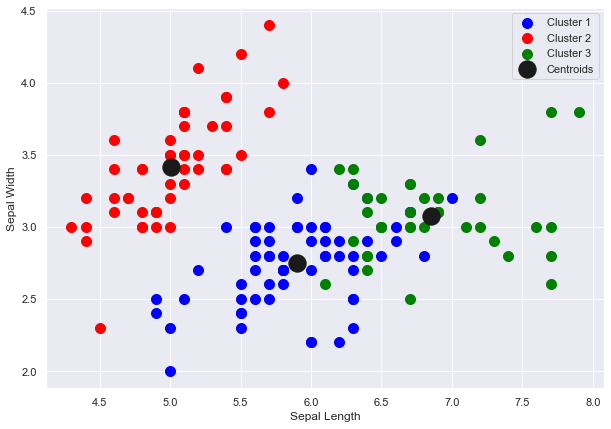

In [9]:
# Plotting using variables Sepal length and Sepal width
D1= x[x['Clusters'] ==0 ]
plt.scatter(D1.iloc[:, 0], D1.iloc[:,1],s=100,  c='blue', label ='Cluster 1')
D2= x[x['Clusters'] ==1 ]
plt.scatter(D2.iloc[:, 0], D2.iloc[:,1], s=100, c='red', label ='Cluster 2')
D3= x[x['Clusters'] ==2 ]
plt.scatter(D3.iloc[:, 0], D3.iloc[:,1], s=100, c='green', label ='Cluster 3')

# Plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], 
            s = 300, c = 'k', label = 'Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()